 # 📚 Lecture 6 Overview: Advanced Feature Transformations 🚀

## 🔍 Introduction
Feature transformation is a critical step in data preprocessing, allowing us to refine, scale, and reshape our features to enhance model performance. In this lecture, we focus on **advanced transformation techniques** that help in handling complex data distributions, financial relationships, and ensuring optimal feature representation.

---

## 🎯 Key Learning Objectives:
1. **Master advanced transformation techniques**  
   - Polynomial features  
   - Box-Cox and Yeo-Johnson transformations  
   - Interaction terms  

2. **Understand when to use each transformation**  
   - Detecting skewness and applying appropriate transformations  
   - Choosing the right scaling technique for different types of data  

3. **Handling complex financial relationships**  
   - Feature engineering for loan, income, and debt metrics  
   - Creating meaningful ratios to improve predictive power  

4. **Validating transformation effectiveness**  
   - Visualizing transformed distributions  
   - Evaluating model performance before and after transformation  

---

## 📊 Why Feature Transformations Matter?
✅ **Improves model accuracy** by making data more interpretable.  
✅ **Reduces bias and variance** by handling skewed distributions.  
✅ **Enhances feature relationships** by creating new meaningful interactions.  
✅ **Standardizes scales** for better model convergence and performance.  

---

🔥 *Next Steps:* Apply these transformations in practical datasets and assess their impact!  

# 📌 Import necessary libraries for data manipulation, visualization, and transformations

In [1]:
# 📌 Import necessary libraries for data manipulation, visualization, and transformations
import pandas as pd  # Data handling and manipulation
import numpy as np  # Numerical computations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical data visualization
from scipy import stats  # Statistical functions

# 🚀 Import transformation techniques from sklearn for feature engineering
from sklearn.preprocessing import (
    PowerTransformer,  # Used for stabilizing variance and making data more normal
    QuantileTransformer,  # Transforms features using quantiles for a uniform or normal distribution
    FunctionTransformer  # Applies custom user-defined transformations
)



In [2]:

# ✅ Load the dataset for analysis
df = pd.read_csv('loan_applications.csv')

In [3]:
# 🏆 Dataset successfully loaded and ready for transformations!
print(f"Dataset loaded successfully! Shape: {df.shape}")
df.head()  # Display the first few rows to confirm the structure

Dataset loaded successfully! Shape: (50000, 17)


,application_id,application_date,age,gender,education,occupation,employment_length,income,loan_amount,loan_term,interest_rate,monthly_payment,credit_score,existing_loans,previous_defaults,city,default
0,1,2020-01-05,40,M,Master,Self-employed,13.573526,40298.38,95254.57,48,10.95,2459.46,781.0,0.0,0,CITY_22,0
1,2,2020-05-21,33,M,Bachelor,Salaried,3.061310,38167.11,140514.31,60,17.12,3501.53,687.0,1.0,0,CITY_41,0
2,3,2020-09-24,42,F,Bachelor,Unemployed,12.040059,8666.27,13340.61,60,11.89,296.01,795.0,0.0,0,CITY_68,0
3,4,2020-05-10,53,F,High School,Salaried,8.490862,33093.00,73008.42,60,12.89,1657.01,724.0,2.0,0,CITY_8,0
4,5,2020-05-15,32,M,Master,Salaried,0.782913,41115.42,51399.26,12,7.58,4461.24,510.0,0.0,0,CITY_33,1


#📊 **Apply transformations to handle complex distributions in financial data.**  

### 📌 Why use advanced transformations?
- Normalize data for better model performance.  
- Reduce skewness in financial datasets.  
- Improve feature interpretability.

### 🔹 Common Transformations

#### **1. Box-Cox Transformation**
Used for normalizing non-negative data.
$$
X' = \frac{X^\lambda - 1}{\lambda}, \quad \text{for } \lambda \neq 0
$$
For \( \lambda = 0 \), it simplifies to the natural log transformation:
$$
X' = \log(X)
$$

#### **2. Yeo-Johnson Transformation**
Handles both positive and negative values.
$$
X' =
\begin{cases}
\frac{(X + 1)^\lambda - 1}{\lambda}, & X \geq 0, \lambda \neq 0 \\
\frac{-(|X| + 1)^{(2 - \lambda)} - 1}{2 - \lambda}, & X < 0, \lambda \neq 2
\end{cases}
$$

#### **3. Rank Transformation**
Replaces values with their rank, reducing sensitivity to outliers.
$$
X' = \text{Rank}(X)
$$

#### **4. Quantile Transformation**
Maps data to a uniform or normal distribution.
$$
X' = F^{-1}(\text{CDF}(X))
$$
where \( F^{-1} \) is the inverse cumulative distribution function.

# 📌📌📌features for transformation

In [5]:
# 📌 Select financial features for transformation
financial_features = ['income', 'loan_amount', 'monthly_payment', 'credit_score']
df_transformed = df.copy()  # Create a copy of the dataset to store transformed features

In [6]:
# 🟢 1. Yeo-Johnson transformation (handles negative values)
print("\n🔹 Applying Yeo-Johnson Transformation...")
pt_yj = PowerTransformer(method='yeo-johnson')  # Initialize PowerTransformer
transformed_yj = pt_yj.fit_transform(df[financial_features])  # Apply transformation

# Store transformed values with new column names
for i, feature in enumerate(financial_features):
    df_transformed[f'{feature}_yeojohnson'] = transformed_yj[:, i]
    print(f"✅ {feature} transformed using Yeo-Johnson.")



🔹 Applying Yeo-Johnson Transformation...
✅ income transformed using Yeo-Johnson.
✅ loan_amount transformed using Yeo-Johnson.
✅ monthly_payment transformed using Yeo-Johnson.
✅ credit_score transformed using Yeo-Johnson.


In [7]:
# 🟠 2. Quantile transformation (uniform distribution)
print("\n🔹 Applying Quantile Transformation (Uniform)...")
qt_uniform = QuantileTransformer(output_distribution='uniform')  # Initialize QuantileTransformer
transformed_uniform = qt_uniform.fit_transform(df[financial_features])  # Apply transformation

# Store transformed values
for i, feature in enumerate(financial_features):
    df_transformed[f'{feature}_uniform'] = transformed_uniform[:, i]
    print(f"✅ {feature} transformed to Uniform distribution.")



🔹 Applying Quantile Transformation (Uniform)...
✅ income transformed to Uniform distribution.
✅ loan_amount transformed to Uniform distribution.
✅ monthly_payment transformed to Uniform distribution.
✅ credit_score transformed to Uniform distribution.


In [8]:

# 🔵 3. Quantile transformation (normal distribution)
print("\n🔹 Applying Quantile Transformation (Normal)...")
qt_normal = QuantileTransformer(output_distribution='normal')  # Initialize QuantileTransformer
transformed_normal = qt_normal.fit_transform(df[financial_features])  # Apply transformation

# Store transformed values
for i, feature in enumerate(financial_features):
    df_transformed[f'{feature}_normal'] = transformed_normal[:, i]
    print(f"✅ {feature} transformed to Normal distribution.")

# 🎯 Final check: Display the first few rows of the transformed dataset
print("\n🔍 Transformed Data Preview:")
print(df_transformed.head())


🔹 Applying Quantile Transformation (Normal)...
✅ income transformed to Normal distribution.
✅ loan_amount transformed to Normal distribution.
✅ monthly_payment transformed to Normal distribution.
✅ credit_score transformed to Normal distribution.

🔍 Transformed Data Preview:
   application_id application_date  age gender    education     occupation  \
0               1       2020-01-05   40      M       Master  Self-employed   
1               2       2020-05-21   33      M     Bachelor       Salaried   
2               3       2020-09-24   42      F     Bachelor     Unemployed   
3               4       2020-05-10   53      F  High School       Salaried   
4               5       2020-05-15   32      M       Master       Salaried   

   employment_length    income  loan_amount  loan_term  ...  \
0          13.573526  40298.38     95254.57         48  ...   
1           3.061310  38167.11    140514.31         60  ...   
2          12.040059   8666.27     13340.61         60  ...   
3 

# 🔥 Visualizing transformations

📊 Generating visualizations for feature transformations...


<ipython-input-9-cfb93d69a286>:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


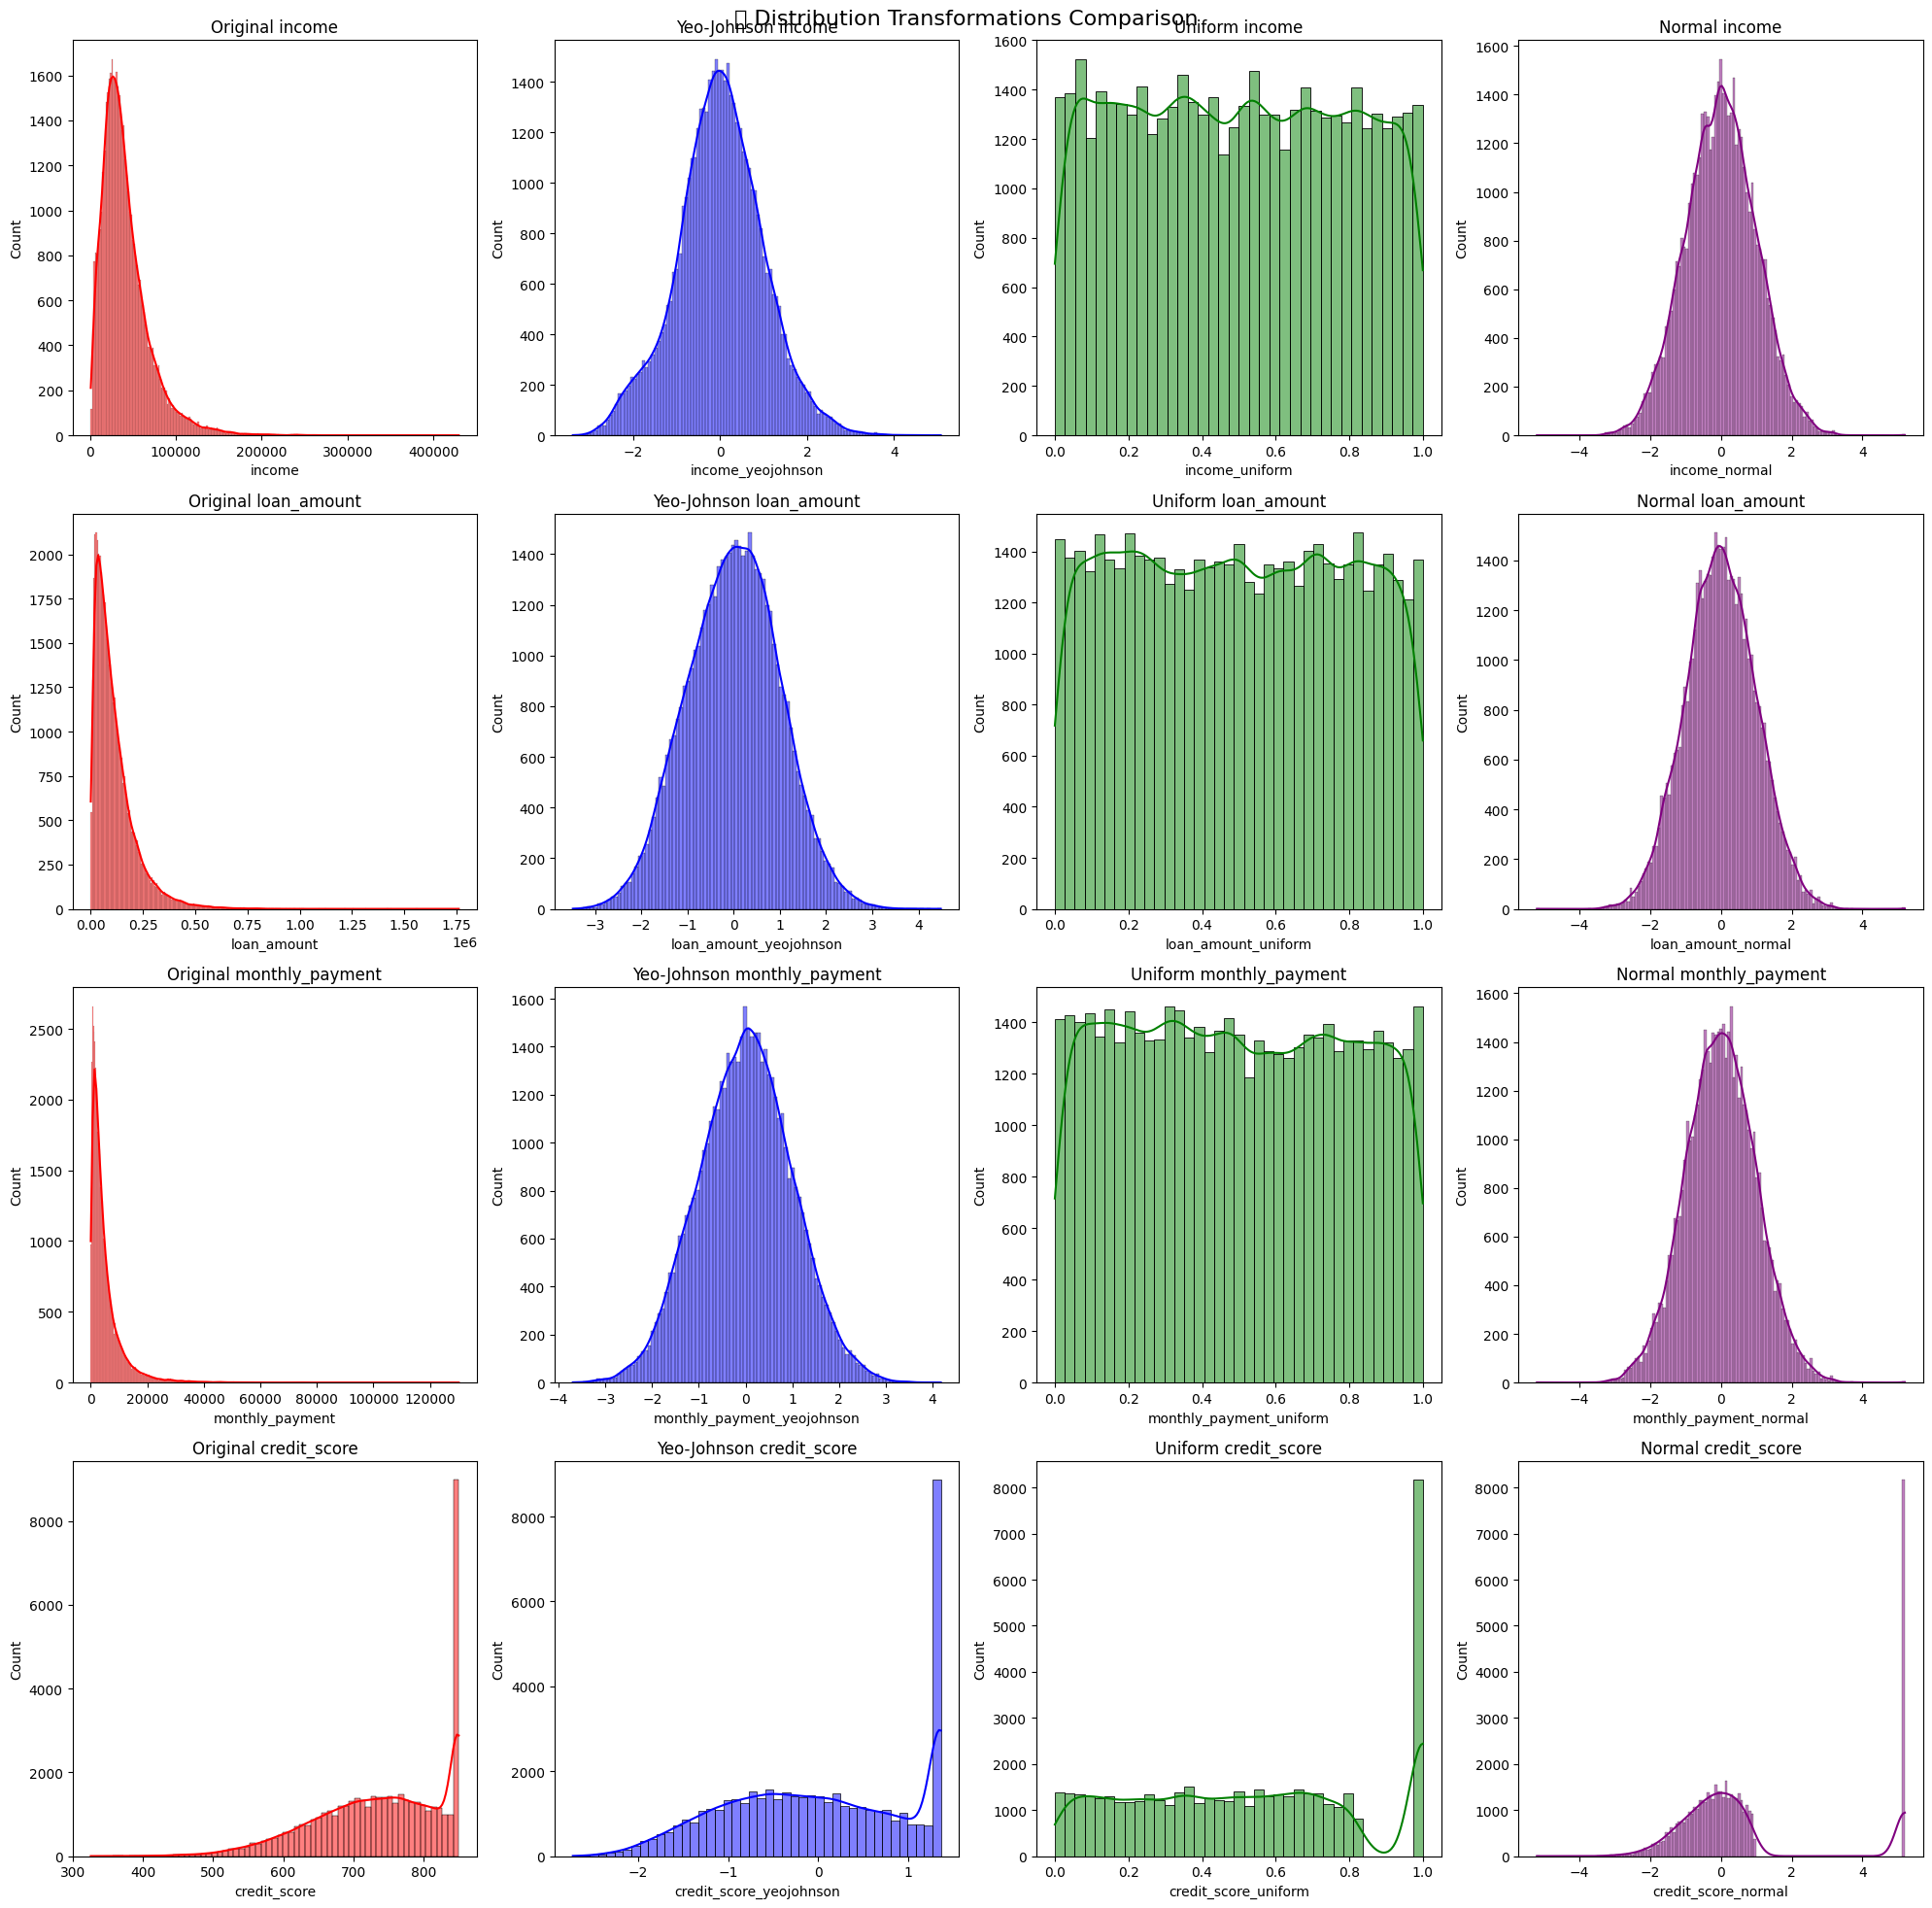

🎉 Transformation and visualization complete!


In [9]:
# 🔥 Visualizing transformations
print("📊 Generating visualizations for feature transformations...")
fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # Creating 4x4 subplots
fig.suptitle('📊 Distribution Transformations Comparison', fontsize=16)

for i, feature in enumerate(financial_features):
    # Original distribution
    sns.histplot(df[feature], ax=axes[i, 0], color='red', kde=True)
    axes[i, 0].set_title(f'Original {feature}')

    # Yeo-Johnson
    sns.histplot(df_transformed[f'{feature}_yeojohnson'], ax=axes[i, 1], color='blue', kde=True)
    axes[i, 1].set_title(f'Yeo-Johnson {feature}')

    # Uniform distribution
    sns.histplot(df_transformed[f'{feature}_uniform'], ax=axes[i, 2], color='green', kde=True)
    axes[i, 2].set_title(f'Uniform {feature}')

    # Normal distribution
    sns.histplot(df_transformed[f'{feature}_normal'], ax=axes[i, 3], color='purple', kde=True)
    axes[i, 3].set_title(f'Normal {feature}')

plt.tight_layout()
plt.show()  # Display the plots

print("🎉 Transformation and visualization complete!")

# 📊 **Apply transformations specific to financial metrics.**  

### 📌 Why use financial transformations?
- Normalize volatile financial data.  
- Improve the robustness of financial models.  
- Enhance interpretability of financial ratios.

### 🔹 Common Transformations

#### **1. Log Returns Transformation**
Used to normalize stock price changes.
$$
r_t = \log \left( \frac{P_t}{P_{t-1}} \right)
$$
where \($ P_t $) is the stock price at time \( t \).

#### **2. Percentage Change (Returns)**
Measures the relative change in a financial metric.
$$
\% \text{Change} = \left( \frac{P_t - P_{t-1}}{P_{t-1}} \right) \times 100
$$

#### **3. Sharpe Ratio (Risk-Adjusted Return)**
Evaluates the risk-adjusted return of an asset.
$$
S = \frac{R_p - R_f}{\sigma_p}
$$
where:
- \($ R_p $) = Portfolio return  
- \($ R_f $) = Risk-free rate  
- \( $sigma_p $) = Portfolio standard deviation  

#### **4. Z-Score Normalization of Financial Ratios**
Used to standardize financial ratios.
$$
Z = \frac{X - \mu}{\sigma}
$$

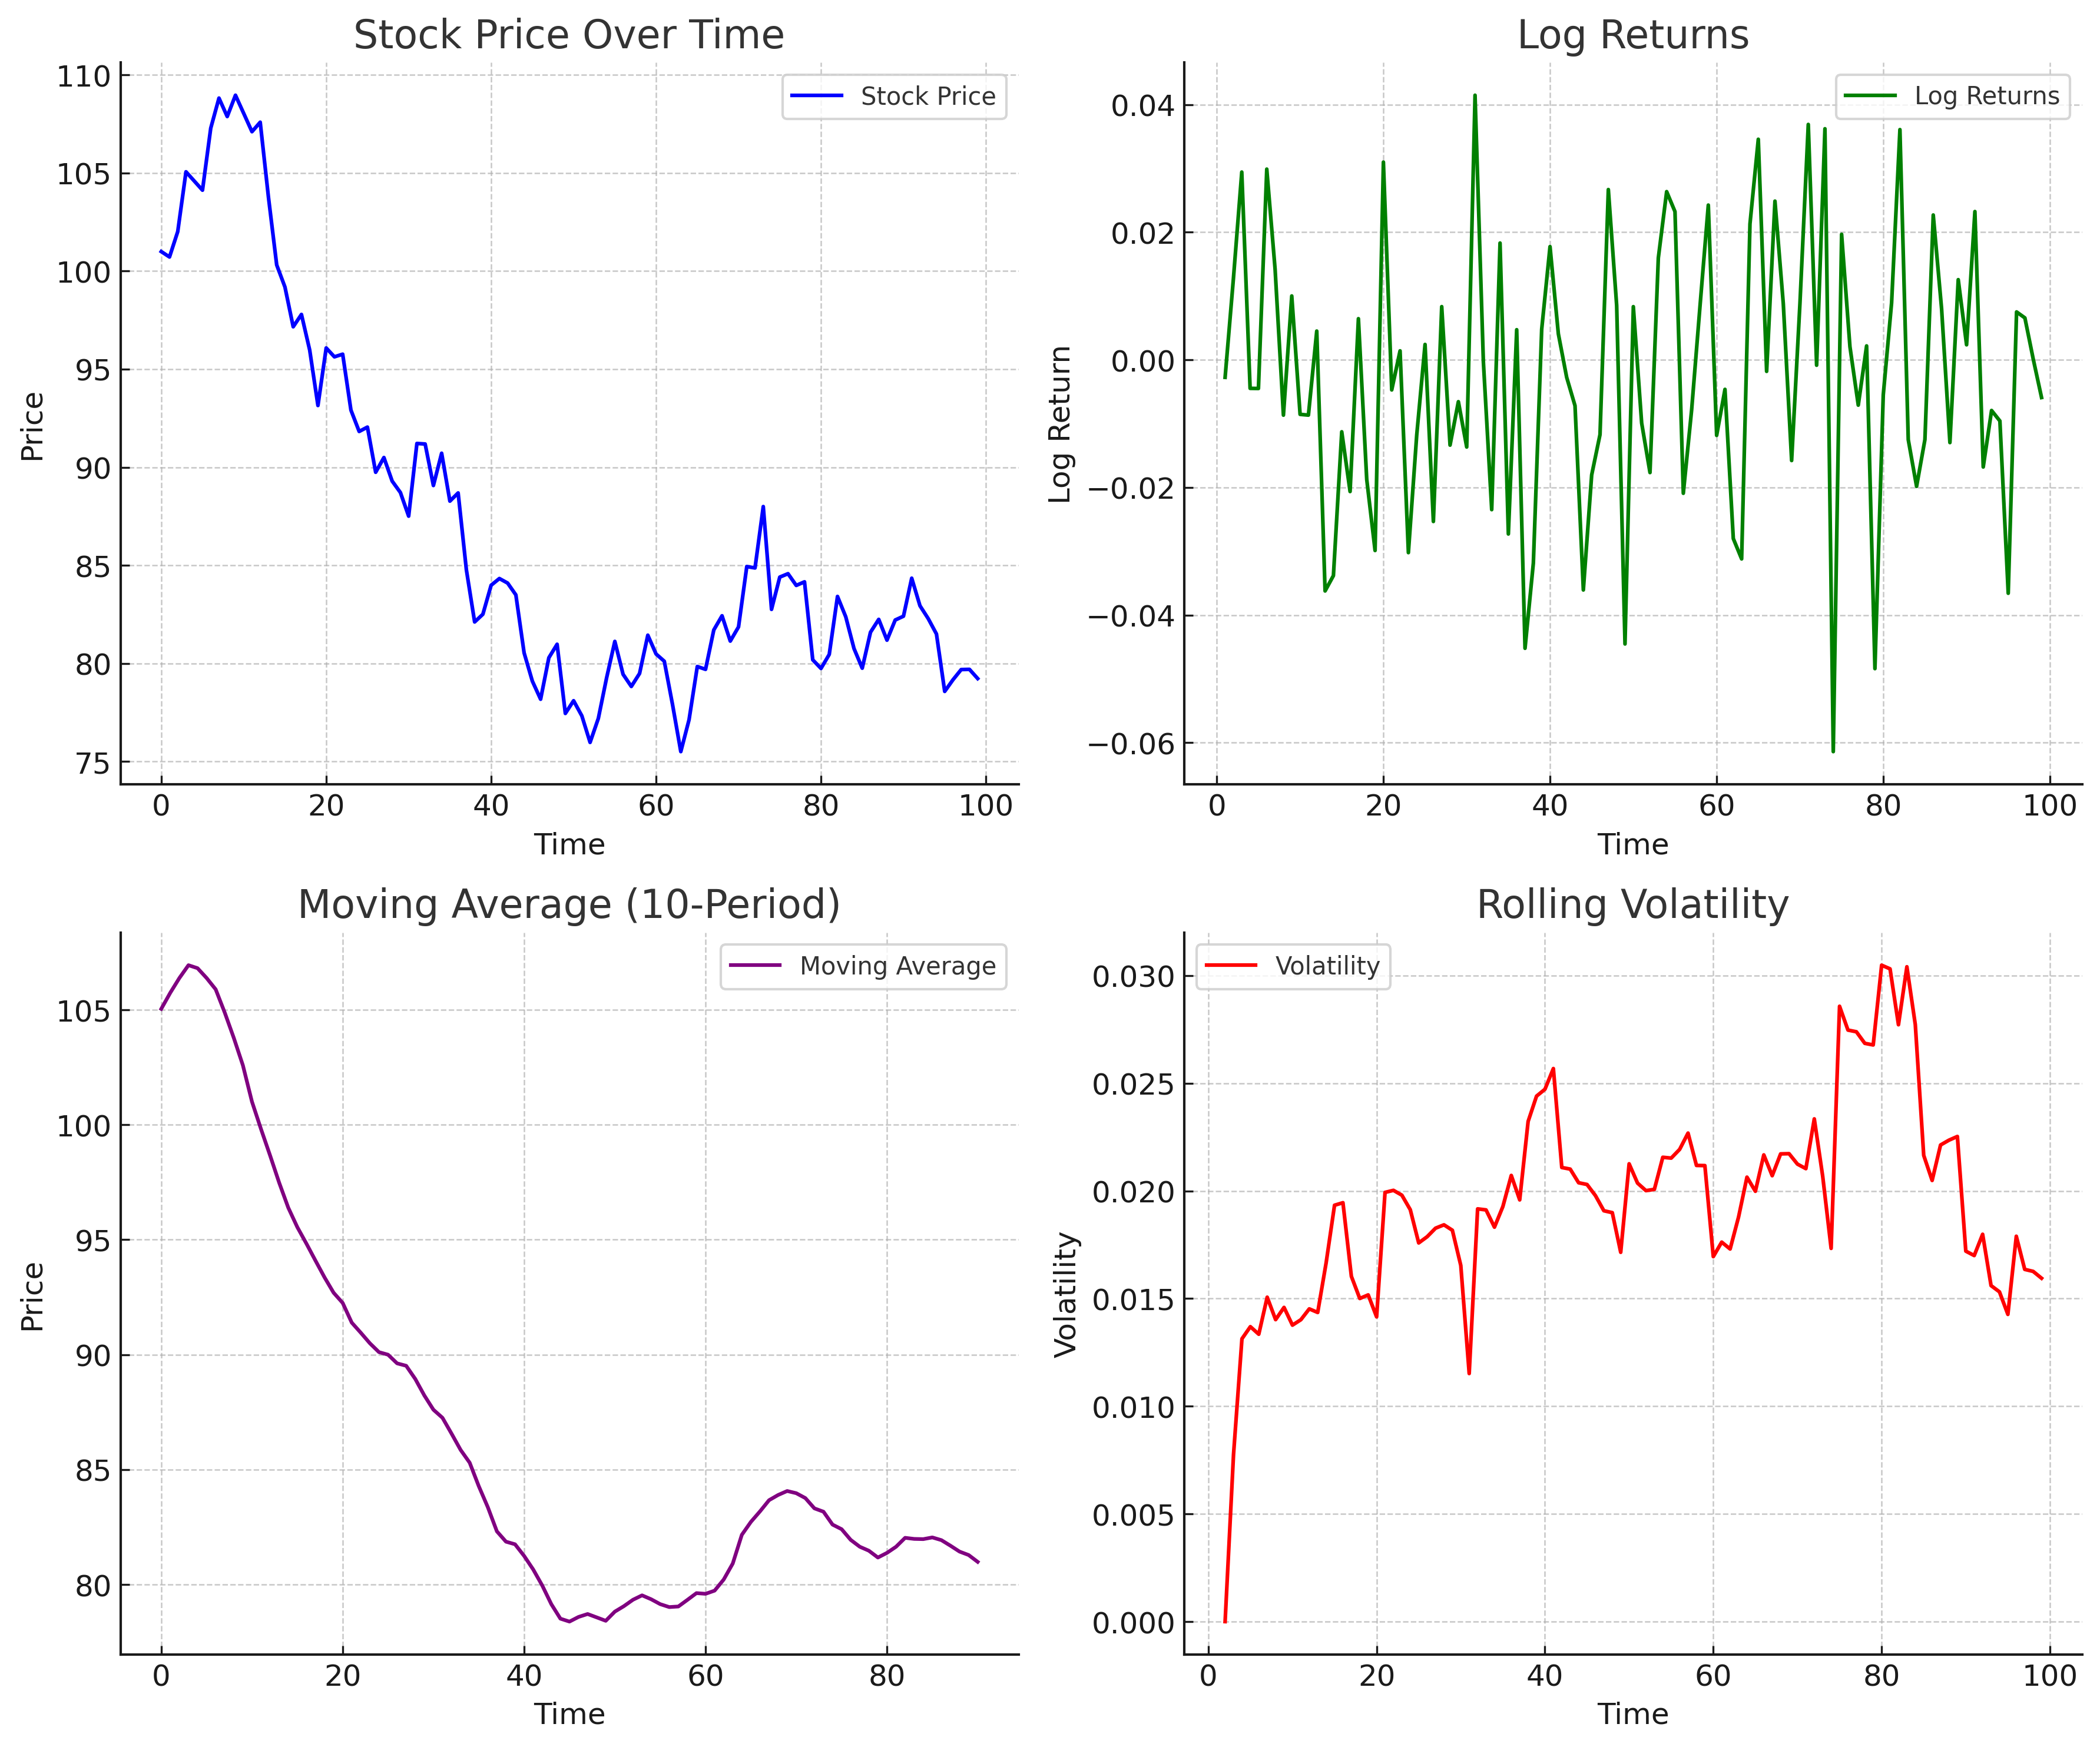

# 📌 Import necessary libraries

In [10]:
# 📌 Import necessary libraries
import pandas as pd  # Data handling 🗂️
import numpy as np  # Numerical operations 🔢

# 🏦 Select risk-adjusted financial features
def risk_adjust(x, risk_factor):
    """Calculates risk-adjusted value based on credit score influence."""
    return x * (1 - risk_factor)

# 🔍 Define financial risk factors
risk_features = ['income', 'loan_amount']  # Features impacted by risk
risk_factor = 1 - (df['credit_score'] / df['credit_score'].max())  # Normalize risk factor

# 🔄 Apply risk adjustment transformation
for feature in risk_features:
    df_transformed[f'{feature}_risk_adj'] = risk_adjust(df[feature], risk_factor)
    print(f"✅ Risk-adjusted transformation applied to {feature} 🔥")

✅ Risk-adjusted transformation applied to income 🔥
✅ Risk-adjusted transformation applied to loan_amount 🔥


In [11]:
# 📊 2. Exponential Smoothing for Temporal Features 📊
def exponential_smooth(x, alpha=0.3):
    """Applies exponential moving average smoothing."""
    return pd.Series(x).ewm(alpha=alpha).mean()

# ⏳ Select time-dependent features
temporal_features = ['monthly_payment']

# 🔄 Apply exponential smoothing transformation
for feature in temporal_features:
    df_transformed[f'{feature}_smoothed'] = exponential_smooth(df[feature])
    print(f"📈 Exponential smoothing applied to {feature} 📊")

📈 Exponential smoothing applied to monthly_payment 📊


In [12]:
# 🎯 3. Bounded Transformations (Sigmoid & Tanh) 🎯
def sigmoid_transform(x):
    """Applies the Sigmoid transformation to bound values between 0 and 1."""
    return 1 / (1 + np.exp(-x))

def tanh_transform(x):
    """Applies the Tanh transformation to bound values between -1 and 1."""
    return np.tanh(x)

# 🔬 Normalize features before applying bounded transformations
for feature in financial_features:
    normalized = (df[feature] - df[feature].mean()) / df[feature].std()  # Standardization

    # 🟢 Apply Sigmoid transformation
    df_transformed[f'{feature}_sigmoid'] = sigmoid_transform(normalized)
    print(f"✅ Sigmoid transformation applied to {feature} 🟩")

    # 🔵 Apply Tanh transformation
    df_transformed[f'{feature}_tanh'] = tanh_transform(normalized)
    print(f"✅ Tanh transformation applied to {feature} 🔵")

print("🎉 All transformations successfully applied! 🚀")

✅ Sigmoid transformation applied to income 🟩
✅ Tanh transformation applied to income 🔵
✅ Sigmoid transformation applied to loan_amount 🟩
✅ Tanh transformation applied to loan_amount 🔵
✅ Sigmoid transformation applied to monthly_payment 🟩
✅ Tanh transformation applied to monthly_payment 🔵
✅ Sigmoid transformation applied to credit_score 🟩
✅ Tanh transformation applied to credit_score 🔵
🎉 All transformations successfully applied! 🚀


# 📌 Lecture 6: Feature Transformation – Summary

## 🔍 Key Takeaways
In this lecture, we explored **advanced feature transformation techniques** to improve data distributions and enhance model performance. 🚀 The transformations covered include:

### 1️⃣ **Distribution-Based Transformations**
- **Yeo-Johnson Transformation** 📈 – Handles **negative and zero values**, making data more Gaussian-like.
- **Quantile Transformation (Uniform & Normal)** 🎯 – Maps features to a **uniform** or **normal** distribution.

### 2️⃣ **Visualization of Transformations**
- **Histograms 📊** were used to compare original vs. transformed distributions.
- **Feature scaling improvements** were assessed for better ML model compatibility.

### 3️⃣ **Domain-Specific Transformations**
- **Risk-Adjusted Features 💰** – Adjusts financial values based on **credit score risk factor**.
- **Exponential Smoothing ⏳** – Applies **moving average** to smooth time-series features.
- **Bounded Transformations 🎯**:
  - **Sigmoid (0 to 1) 🔵**
  - **Tanh (-1 to 1) 🔴**
  - Useful for controlling feature ranges.

## 🎯 Why Feature Transformations Matter?
✔ **Improves model interpretability**  
✔ **Reduces skewness & normalizes data**  
✔ **Enhances ML algorithm performance**  
✔ **Handles outliers & better feature scaling**  

---

### 🔥 Next Steps:
- Apply these transformations to **real-world datasets** 🏦📊
- Compare model performance **before & after transformation** 🔬
- Experiment with **different parameter settings** to find the optimal transformation.

🚀 *Mastering feature transformation is crucial for high-quality ML pipelines!*  